In [2]:
import os
HOME=os.getcwd()
print(HOME)

/workspaces/PruebaTaller


In [3]:
!sudo apt-get update
!sudo apt-get install -y libgl1-mesa-glx
!ulimit -v 6000000

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease                 
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease               
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease               
Hit:5 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease       
Hit:6 https://dl.yarnpkg.com/debian stable InRelease                           
Get:7 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease [3611 B]
Hit:8 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease
Fetched 3611 B in 1s (3619 B/s)                 
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (21.2.6-0ubuntu0.1~20.04.2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.8 torch-2.1.0+cu121 CPU (AMD EPYC 7763 64-Core Processor)
Setup complete ✅ (2 CPUs, 7.7 GB RAM, 19.9/31.3 GB disk)


In [5]:
from ultralytics import YOLO

In [17]:
import cv2
from IPython.display import display, Image

In [6]:
# Load a model
model = YOLO("yolov8s.pt")

# Use the model
results = model.train(data="custom_data.yaml", epochs=5, workers=1, batch=10, imgsz=416, lr0 = 0.001,
                      lrf = 0.001, overlap_mask = True, mask_ratio = 4)

Ultralytics YOLOv8.0.208 🚀 Python-3.10.8 torch-2.1.0+cu121 CPU (AMD EPYC 7763 64-Core Processor)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=custom_data.yaml, epochs=5, patience=50, batch=10, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

In [8]:
model = YOLO("runs/detect/train10/weights/best.pt")
model.predict(source = "custom_dataset/test/images", save=True, imgsz=416, conf=0.5)


image 1/5 /workspaces/PruebaTaller/custom_dataset/test/images/2016-09-05_10-31-21_png.rf.d3aa346de50698c6580e617d2e8b41be.jpg: 416x256 (no detections), 118.2ms
image 2/5 /workspaces/PruebaTaller/custom_dataset/test/images/2016-09-05_11-01-27_png.rf.210d6532d1e00918131fa4b7b4046664.jpg: 416x256 (no detections), 112.0ms
image 3/5 /workspaces/PruebaTaller/custom_dataset/test/images/2016-09-06_07-05-38_png.rf.3e9447f3dbad96ea1bfbb0d535f91d76.jpg: 416x256 3 PlantaTomates, 120.2ms
image 4/5 /workspaces/PruebaTaller/custom_dataset/test/images/2016-09-06_08-05-50_png.rf.b5012bd00e5df5c2dc99a943291e8293.jpg: 416x256 3 PlantaTomates, 111.2ms
image 5/5 /workspaces/PruebaTaller/custom_dataset/test/images/2016-09-07_04-40-07_png.rf.f339ad22fa0c402395c8a8c95c8400ab.jpg: 416x256 4 PlantaTomates, 110.3ms
Speed: 0.9ms preprocess, 114.4ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 256)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'PlantaTomate'}
 orig_img: array([[[160, 157, 159],
         [154, 151, 153],
         [158, 155, 157],
         ...,
         [159, 156, 158],
         [159, 156, 158],
         [159, 156, 158]],
 
        [[160, 157, 159],
         [154, 151, 153],
         [157, 154, 156],
         ...,
         [158, 155, 157],
         [158, 155, 157],
         [158, 155, 157]],
 
        [[160, 157, 159],
         [154, 151, 153],
         [155, 152, 154],
         ...,
         [157, 154, 156],
         [157, 154, 156],
         [157, 154, 156]],
 
        ...,
 
        [[121, 109, 109],
         [123, 111, 111],
         [126, 114, 114],
         ...,
         [139, 129, 129],
         [139, 129, 129],
         [140, 130, 130]],
 
        [[122, 110, 110],
         [123, 111, 111],
         [125, 113, 113],
         ...,
         [139, 129, 129

In [10]:
results = model.predict(source="custom_dataset/test/images/2016-09-07_04-40-07_png.rf.f339ad22fa0c402395c8a8c95c8400ab.jpg")


image 1/1 /workspaces/PruebaTaller/custom_dataset/test/images/2016-09-07_04-40-07_png.rf.f339ad22fa0c402395c8a8c95c8400ab.jpg: 416x256 4 PlantaTomates, 115.3ms
Speed: 1.2ms preprocess, 115.3ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 256)


In [11]:
for result in results:
    # Detection
    result.boxes.xyxy   # box with xyxy format, (N, 4)
    result.boxes.xywh   # box with xywh format, (N, 4)
    result.boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
    result.boxes.xywhn  # box with xywh format but normalized, (N, 4)
    result.boxes.conf   # confidence score, (N, 1)
    result.boxes.cls    # cls, (N, 1)

In [12]:
result.boxes.xyxy

tensor([[ 179.1825,  544.5980,  448.7861, 1034.3263],
        [ 259.2525,  670.6780,  569.4908, 1050.4601],
        [ 198.8368,  651.4589,  383.6626, 1038.3813],
        [ 234.1895,  645.8953,  460.3368, 1033.4186]])

In [13]:
result.boxes.xywh

tensor([[313.9843, 789.4622, 269.6035, 489.7283],
        [414.3716, 860.5690, 310.2383, 379.7821],
        [291.2497, 844.9201, 184.8258, 386.9225],
        [347.2631, 839.6569, 226.1472, 387.5233]])

In [14]:
boxes = results[0].boxes
box = boxes[0]  # returns one box
box.xyxy

tensor([[ 179.1825,  544.5980,  448.7861, 1034.3263]])

In [19]:
res_plotted = results[0][0].plot(boxes=True)

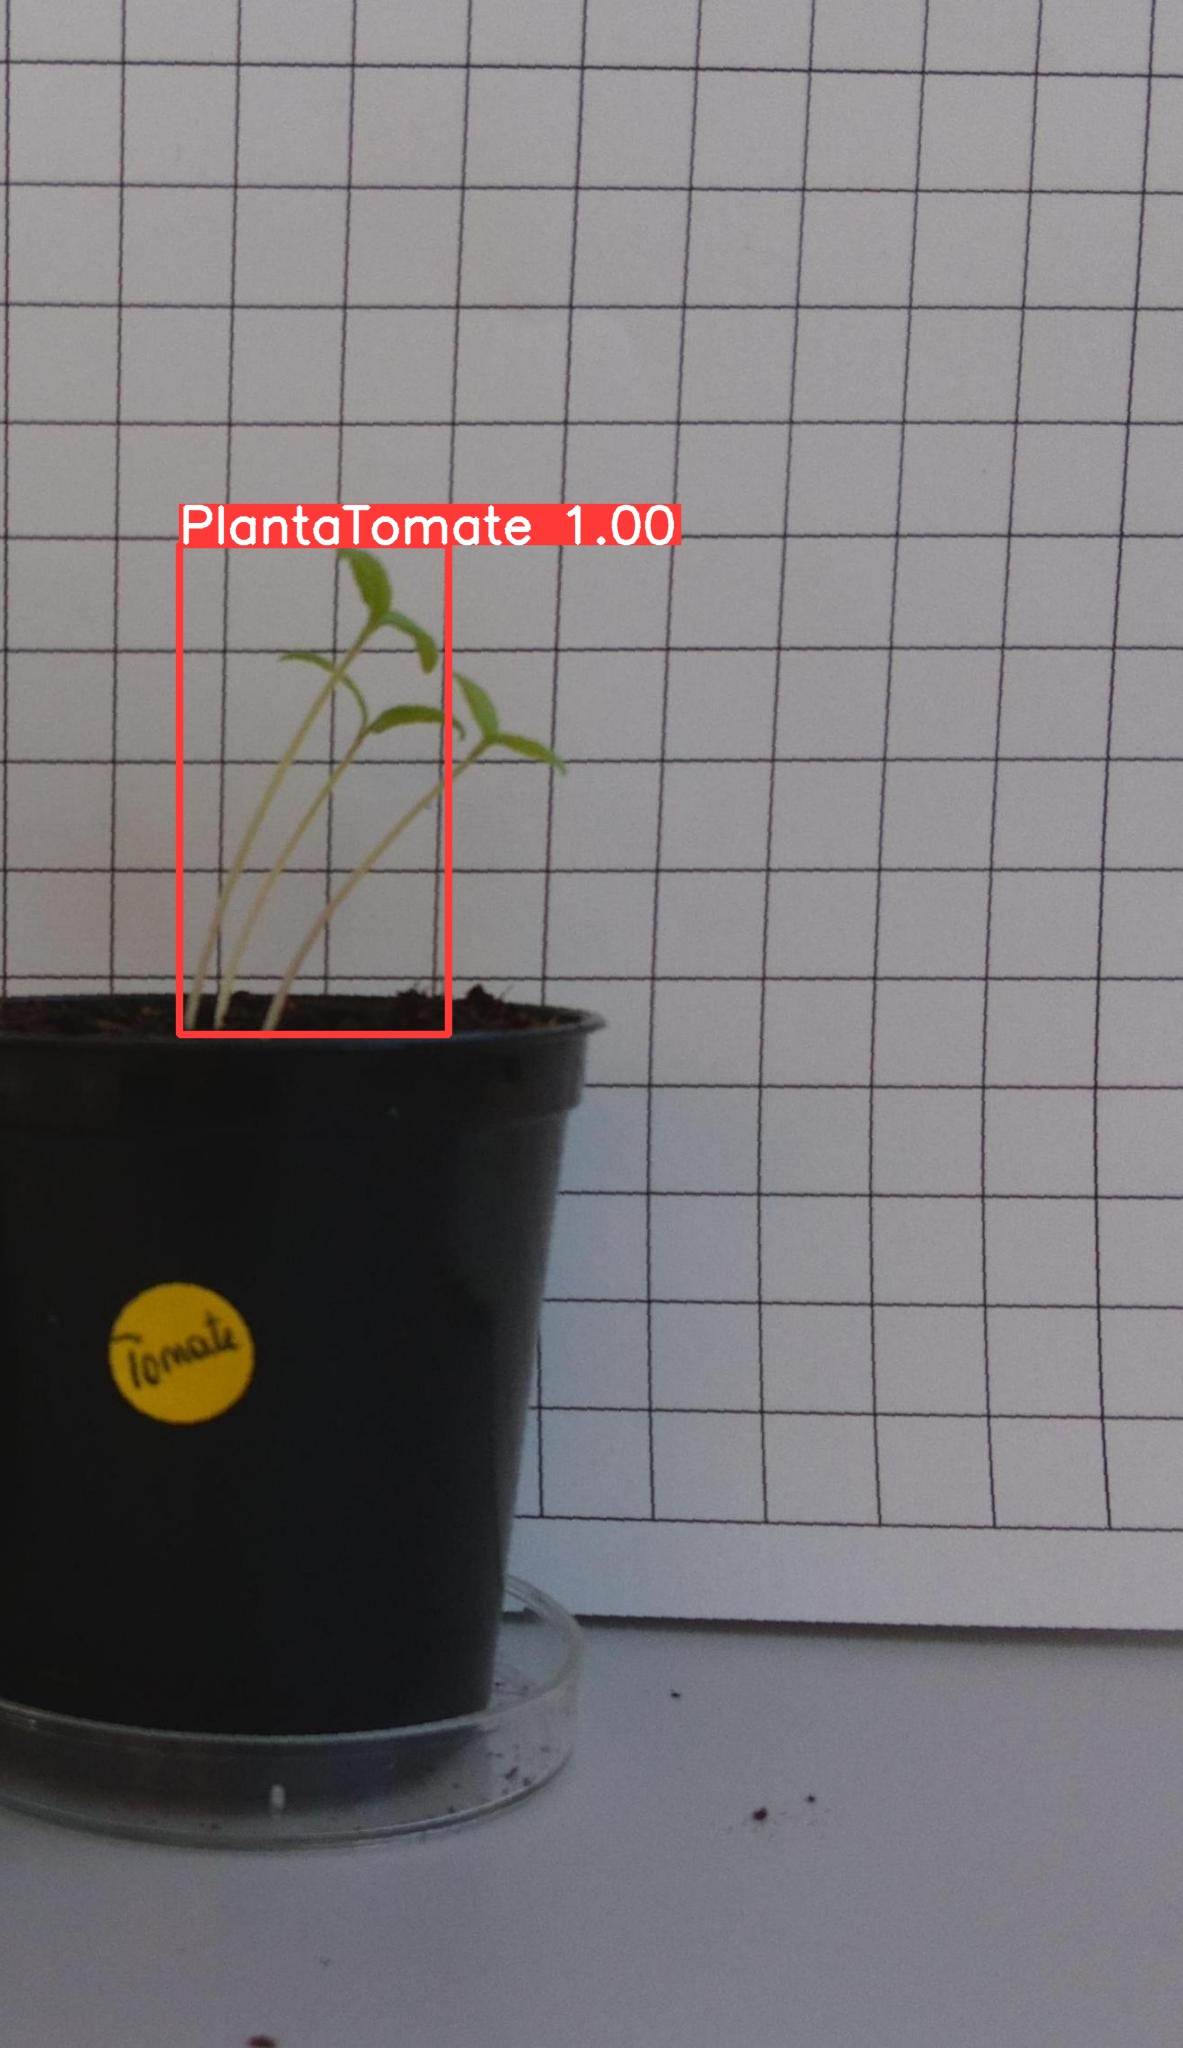

In [20]:
# Muestra la imagen
display(Image(data=cv2.imencode('.jpg', res_plotted)[1].tobytes()))

In [21]:
result.boxes.xyxyn

tensor([[0.1515, 0.2659, 0.3794, 0.5050],
        [0.2191, 0.3275, 0.4814, 0.5129],
        [0.1681, 0.3181, 0.3243, 0.5070],
        [0.1980, 0.3154, 0.3891, 0.5046]])

In [22]:
# Calcular el ancho con el x_min y x_max de las cajas de una imagen en terminos normalizados
boxes = result.boxes.xyxyn.tolist()
x_min = float('inf')
x_max = float('-inf')
for box in boxes:
    x_min = min(x_min, box[0])
    x_max = max(x_max, box[2])
print(f"El ancho de la planta es de {x_max - x_min} en porcentaje")

El ancho de la planta es de 0.3299309015274048 en porcentaje


In [23]:
# Calcular el alto con el y_min y y_max de las cajas de una imagen en terminos normalizados
boxes = result.boxes.xyxyn.tolist()
y_min = float('inf')
y_max = float('-inf')
for box in boxes:
    y_min = min(y_min, box[1])
    y_max = max(y_max, box[3])
print(f"El alto de la planta es de {y_max - y_min} en porcentaje")

El alto de la planta es de 0.2470029592514038 en porcentaje


In [24]:
# Calcular el ancho con el x_min y x_max de las cajas de una imagen en pixeles
boxes = result.boxes.xyxy.tolist()
x_min = float('inf')
x_max = float('-inf')
for box in boxes:
    x_min = min(x_min, box[0])
    x_max = max(x_max, box[2])
print(f"El ancho de la planta es de {x_max - x_min} en pixeles")

El ancho de la planta es de 390.3082580566406 en pixeles


In [25]:
# Calcular el alto con el y_min y y_max de las cajas de una imagen en pixeles
boxes = result.boxes.xyxy.tolist()
y_min = float('inf')
y_max = float('-inf')
for box in boxes:
    y_min = min(y_min, box[1])
    y_max = max(y_max, box[3])
print(f"El alto de la planta es de {y_max - y_min} en pixeles")

El alto de la planta es de 505.862060546875 en pixeles


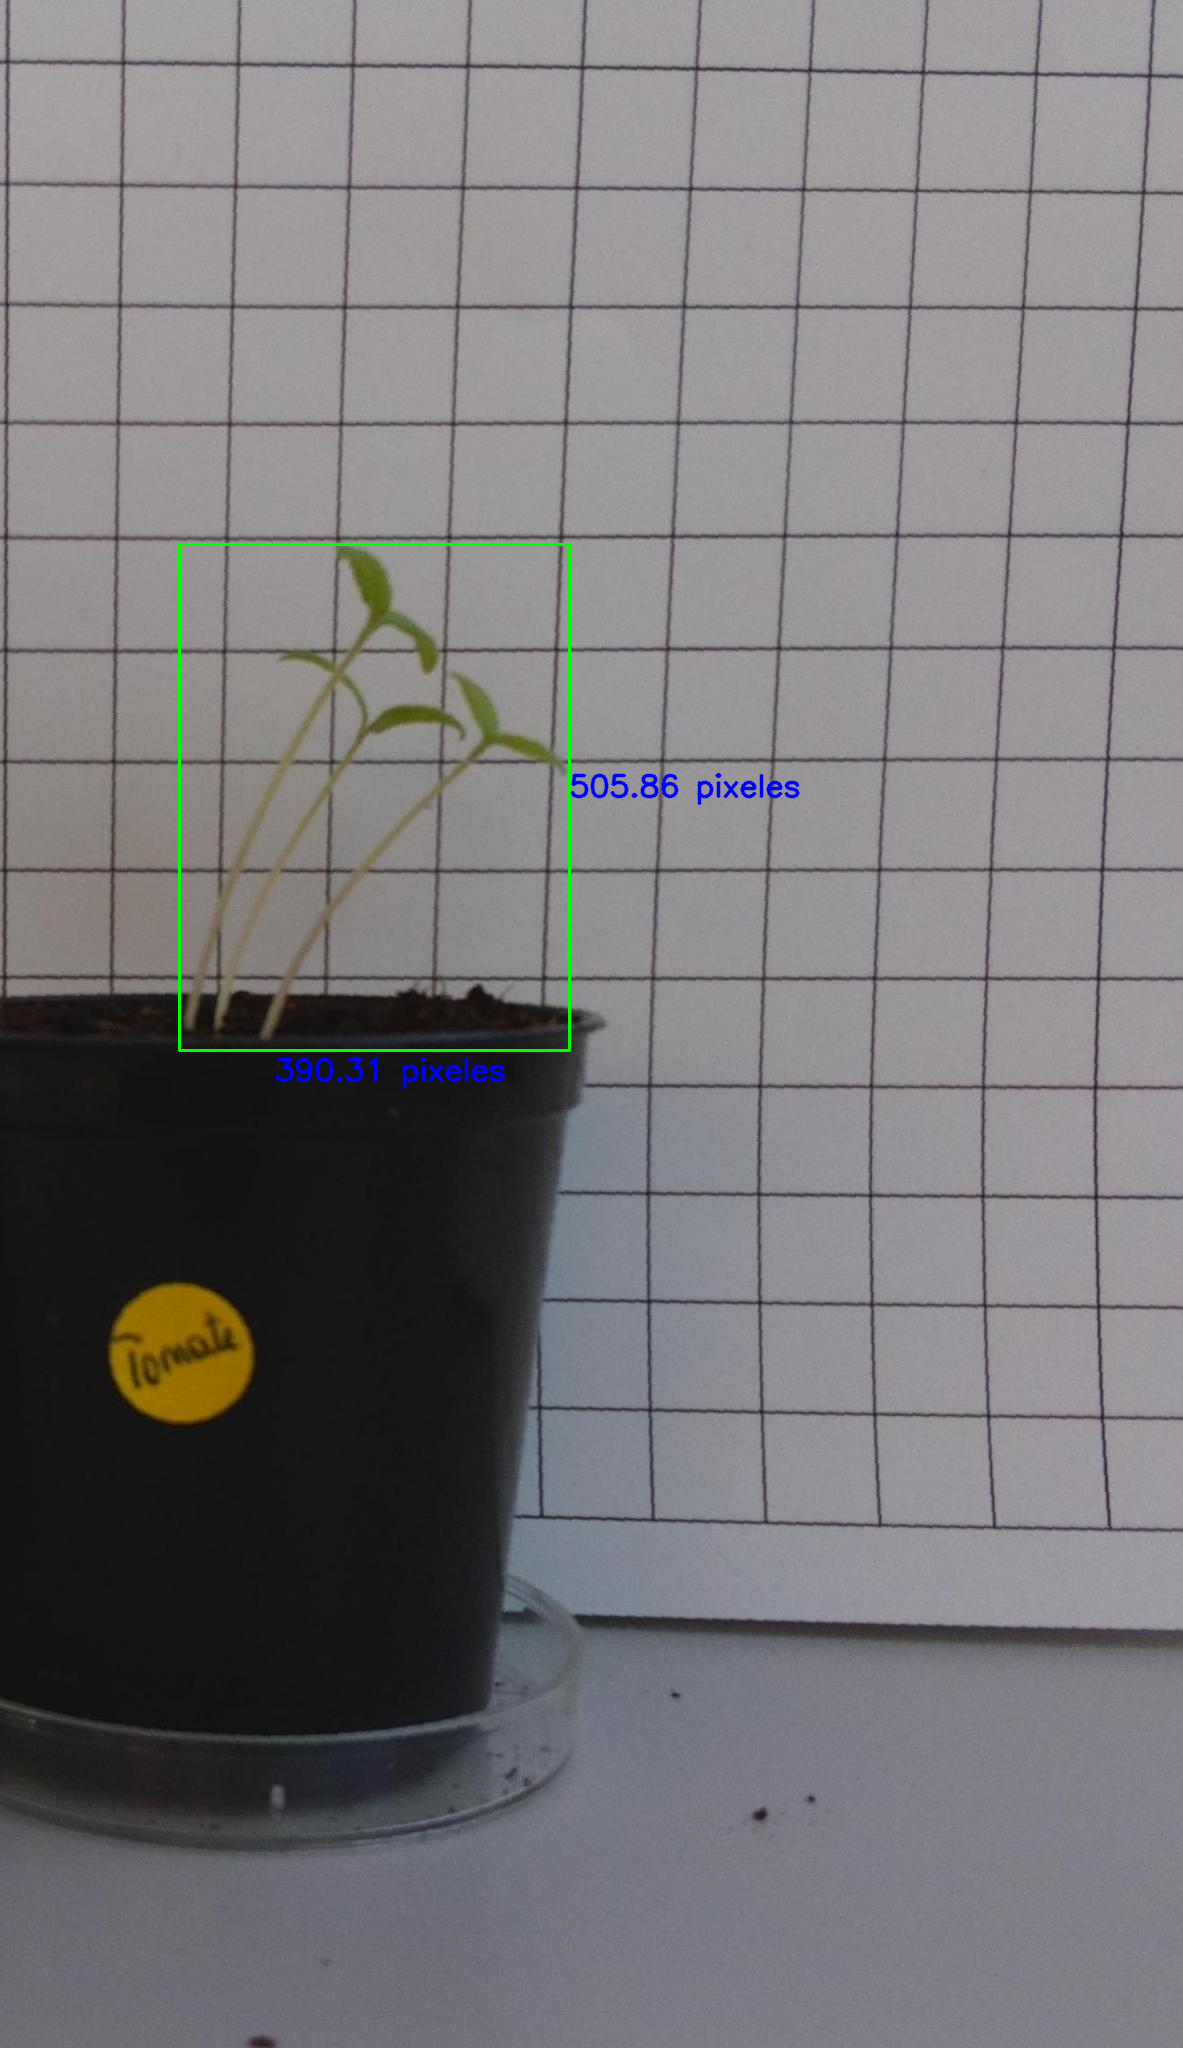

In [28]:
# Lee la imagen con OpenCV
image = cv2.imread("custom_dataset/test/images/2016-09-07_04-40-07_png.rf.f339ad22fa0c402395c8a8c95c8400ab.jpg")

# Dibujar el cuadro delimitador en la imagen
cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

label_width_position = (int(x_min) + int((x_max - x_min) // 2) - 100, int(y_max) + 30)
label_height_position = (int(x_max), int(y_min) + int((y_max - y_min) // 2))

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

# Agrega texto a la imagen
image = cv2.putText(image, f'{round(x_max - x_min, 2)} pixeles', label_width_position, font,
                   fontScale, color, thickness, cv2.LINE_AA)
image = cv2.putText(image, f'{round(y_max - y_min, 2)} pixeles', label_height_position, font,
                   fontScale, color, thickness, cv2.LINE_AA)

# Convierte la imagen de OpenCV a un formato compatible con IPython.display.display
_, buffer = cv2.imencode('.png', image)
image_data = buffer.tobytes()

# Muestra la imagen usando IPython.display.display
display(Image(data=image_data))

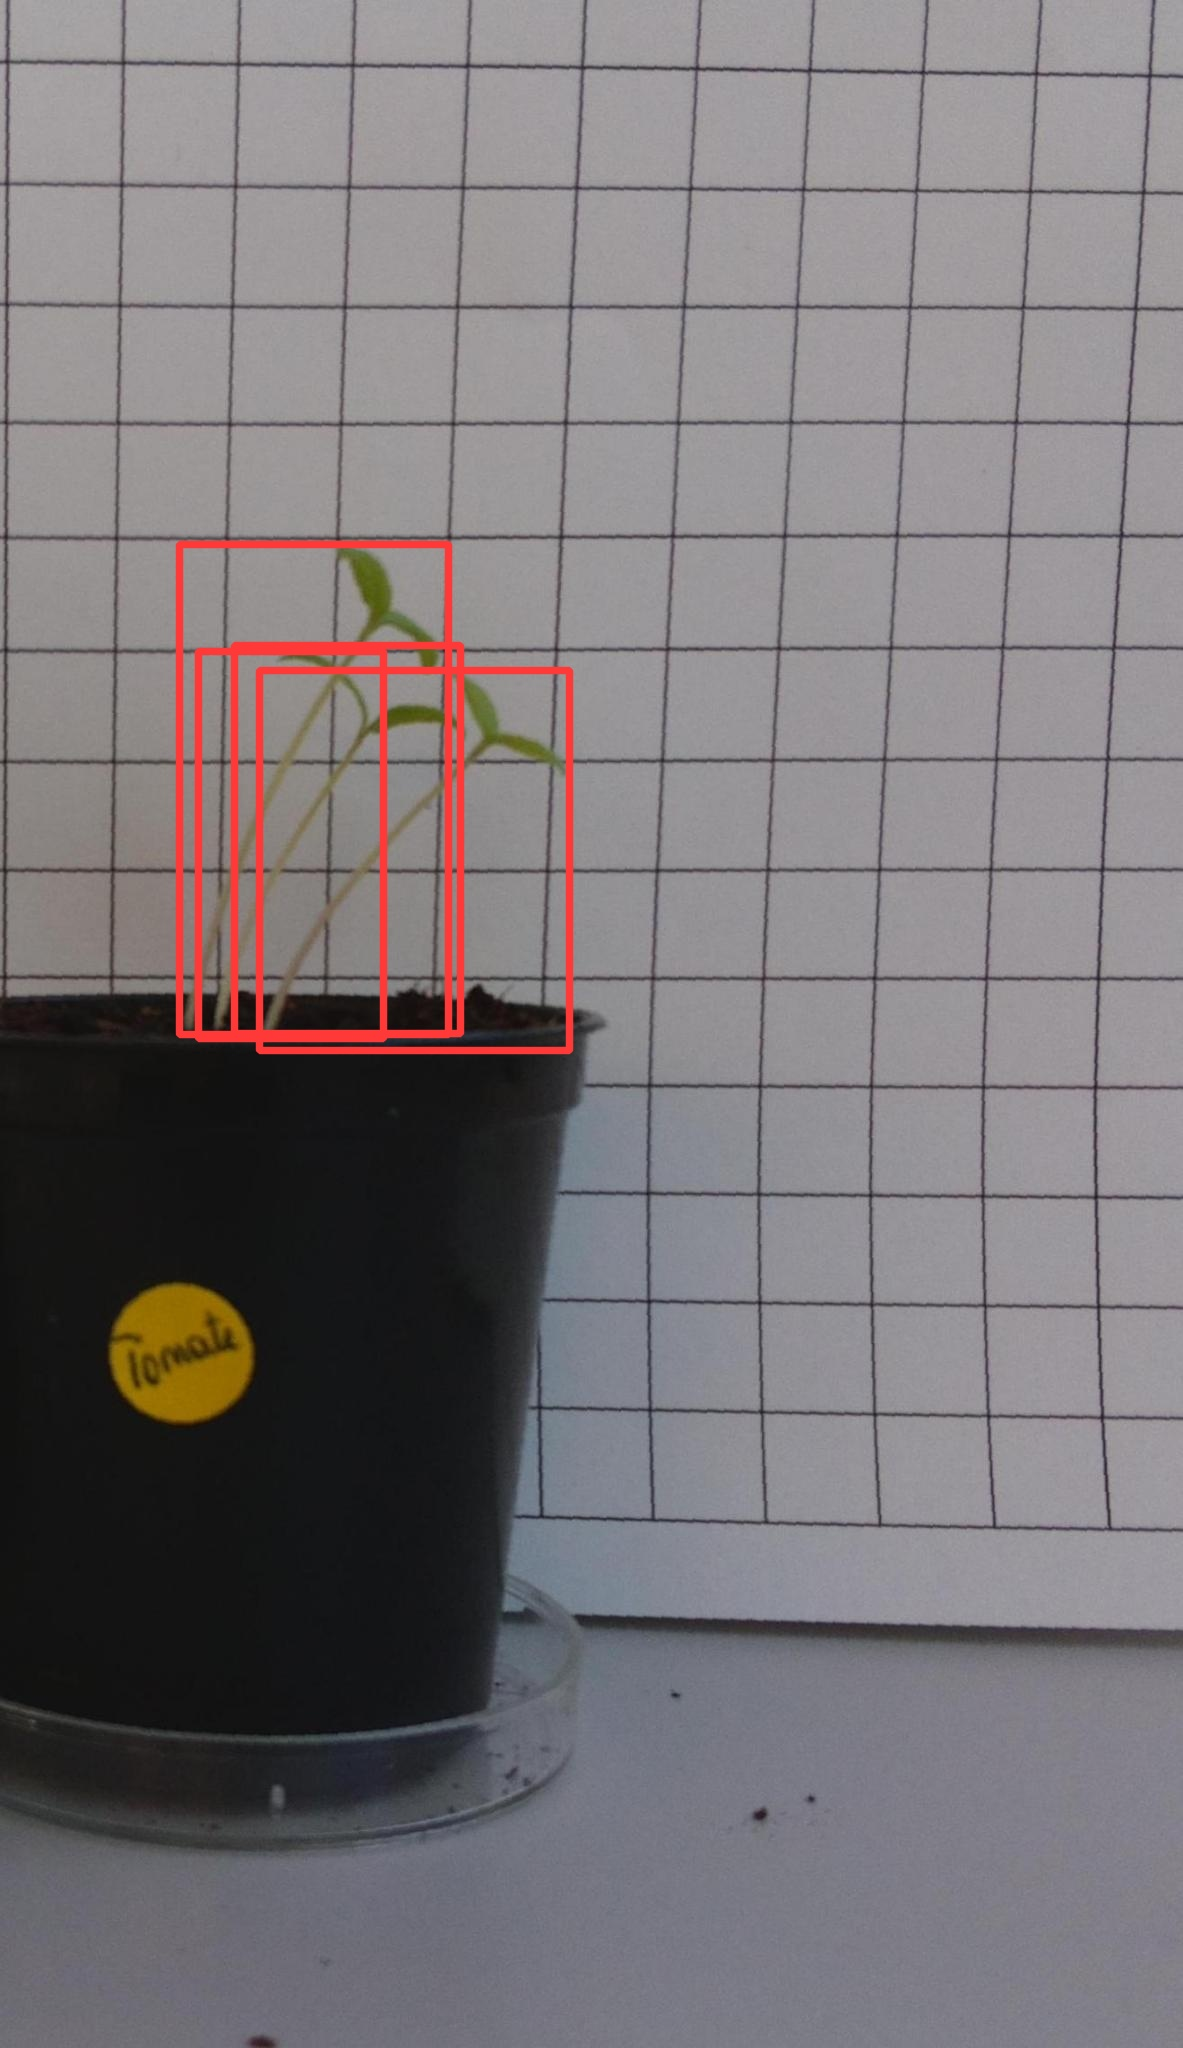

In [29]:
res_plotted = results[0].plot(labels=False)
display(Image(data=cv2.imencode('.jpg', res_plotted)[1].tobytes()))